In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))


In [ ]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.ylabel('')
plt.title('Work from home status')

plt.show()

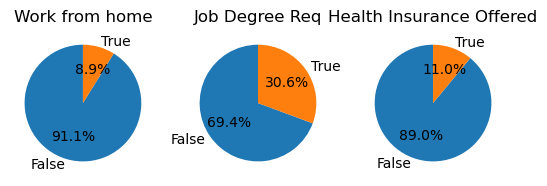

In [17]:
fig, ax = plt.subplots(1,3)

dict_column = {

    'job_work_from_home' : 'Work from home',
    'job_no_degree_mention' : 'Job Degree Req',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels = df[column].value_counts().index.map(str) )
    ax[i].set_title(title)

plt.show()